#chorogrid tutorial, part 2:

## Chorogrid class

This class can be used independently of the Colorbin class shown in part 1, and vice-versa, but they work well together.

In [1]:
# import the classes
from chorogrid import Colorbin, Chorogrid

# read the docs
help(Chorogrid)

Help on class Chorogrid in module chorogrid.Chorogrid:

class Chorogrid(builtins.object)
 |  An object which makes choropleth grids, instantiated with:
 |      csv_path: the path to a csv data file with the following columns:
 |          * ids: e.g., states or countries, corresponding to
 |                 the Colorbin.colorlist
 |          * coordinates or path
 |      ids: a listlike object of ids corresponding to colors
 |      colors: a listlike object of colors in hex (#123456) format
 |              corresponding to ids
 |      id_column: the name of the column in csv_path containing ids
 |                 if there is not a 1:1 map between the ids object
 |                 and the contents of id_column, you will be warned
 |      
 |  Methods (introspect to see arguments)
 |     set_colors: pass a new list of colors to replace the one
 |                 used when the class was instantiated
 |     set_title: set a title for the map
 |     set_legend: set a legend
 |     add_svg: a

We'll load some sample data that reports the number of people living in the same home as one year ago per state in the United States, and use Colorbin to associate these numbers to colors. See Tutorial 1 for information on how Colorbin works.

In [2]:
mycolors = ['#b35806', '#f1a340', '#fee0b6', '#d8daeb', '#998ec3', '#542788']
import pandas as pd
df = pd.read_csv('chorogrid/sample_data/sample_state_data.csv')
mybin = Colorbin(df['Percent_living_in_same_home_as_one_year_ago'], mycolors, proportional=True, decimals=None)
mybin.set_decimals(1)
mybin.recalc(fenceposts=True)
mybin.calc_complements(0.5, '#e0e0e0', '#101010')

Here's the tail of the dataframe.

In [3]:
df.tail()

,state,Percent_living_in_same_home_as_one_year_ago
46,CA,84.2
47,AZ,80.4
48,AR,83.6
49,AL,85.0
50,AK,80.3


Now here's a look at all the objects we'll use to make further maps, lists that are either the length of the number of observations (51) or the number of colors (6).

In [4]:
states = list(df.state)
colors_by_state = mybin.colors_out
font_colors_by_state = mybin.complements
legend_colors = mybin.colors_in
legend_labels = mybin.labels

for lst in ['states', 'colors_by_state', 'font_colors_by_state', 'legend_colors', 'legend_labels']:
    obj = eval(lst)
    print("{:>20}: len {:2}: {}...".format(lst, len(obj), obj[:3]))

              states: len 51: ['WY', 'WV', 'WI']...
     colors_by_state: len 51: ['#fee0b6', '#542788', '#d8daeb']...
font_colors_by_state: len 51: ['#101010', '#e0e0e0', '#101010']...
       legend_colors: len  6: ['#b35806', '#f1a340', '#fee0b6']...
       legend_labels: len  6: ['77.7-79.8', '79.8-81.8', '81.8-83.9']...


Here is the database within Chorogrid for U.S. states, containing identifying information and instructions for hex, square, multihex and map choropleths.

In [5]:
_ = pd.read_csv('chorogrid/databases/usa_states.csv')
print(_.iloc[0])

abbrev                                                                   AK
full_name                                                            Alaska
long_abbrev                                                           Alas.
FIPS                                                                      2
pop                                                                  710231
sqmi                                                               663267.3
map_path                  m 135.58488,358.02208 -0.24846,65.59232 1.2422...
map_fill_default                                                          2
map_label_x                                                        99.76261
map_label_y                                                        398.1729
map_label_text_anchor                                                middle
map_label_line_path                                                     NaN
altmap_path               m 151.26632,459.09682 -0.31386,83.24785 1.5692...
square_x    

And here's a help file with descriptions of all the columns in the cell above.

In [6]:
with open('chorogrid/databases/usa_states_column_descriptions.txt') as f:
    print(f.read())

abbrev                       Postal abbreviation for 50 states and D.C.
full_name                    Full name
long_abbrev                  Abbreviation, based on but not identical to recommendations of Associated Press
FIPS                         Federal Information Processing Standards
pop                          Population in 2013
sqmi                         Area in square miles

map_path                     SVG path for geographic map
map_fill_default             Number, 1-4, so that no states sharing a border will have same fill
map_label_x                  X-coordinate for map label, e.g. state name
map_label_y                  Y-coordinate for map label
map_label_text_anchor        Text anchor (start, middle, end) for label
map_label_line_path          Path for line connecting state and label, if applicable

altmap_path                  Alternate SVG path, without labels

square_x                     Horizontal position of square grid
square_y                     Vertical pos

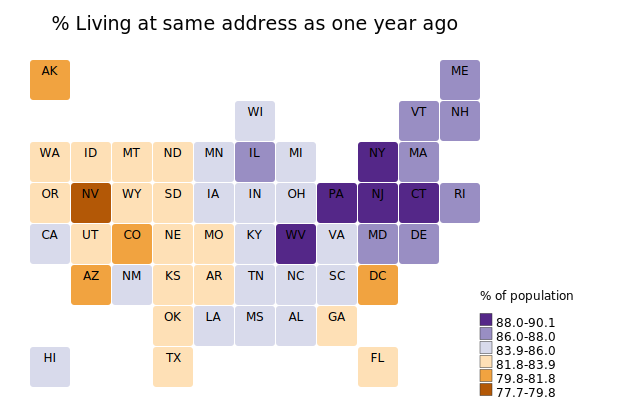

In [7]:
cg = Chorogrid('chorogrid/databases/usa_states.csv', states, colors_by_state)
cg.set_title('% Living at same address as one year ago', font_dict={'font-size': 19})
cg.set_legend(legend_colors, legend_labels, title='% of population')
cg.draw_squares(spacing_dict={'margin_right': 150}) # otherwise legend will be cut off
    # another strategy would be to pass a legend_offset to spacing_dict
cg.done(show=True)

Note that it's very difficult to see the text in the darkest-colored states. Luckily we've create a list of font colors based on Colorbin's ``complement`` method. Let's rerun the last two lines of the cell above, but with font colors specified.

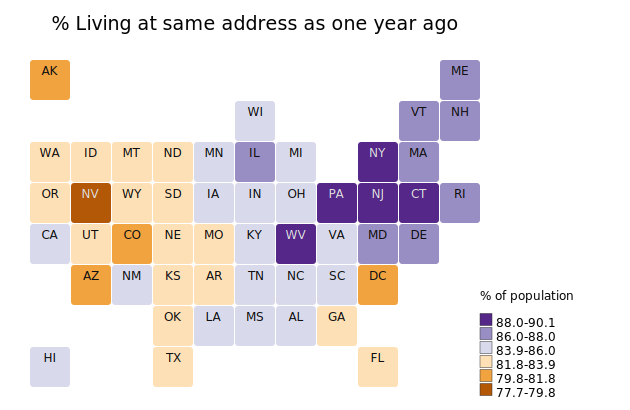

In [8]:
cg.draw_squares(spacing_dict={'margin_right': 150}, font_colors=font_colors_by_state)
cg.done(show=True)

Here's an alternate layout of squares.

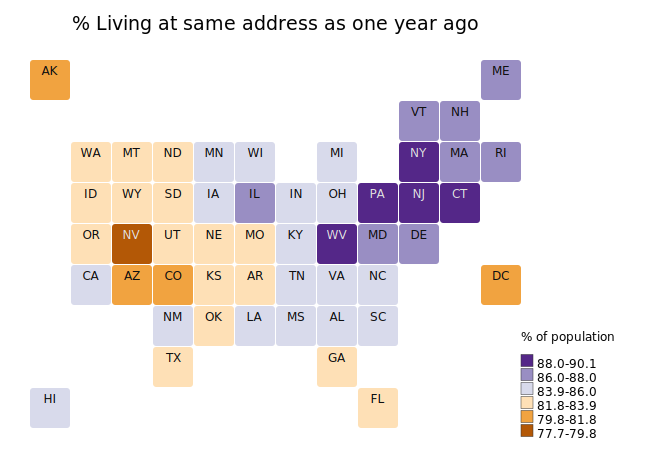

In [9]:
cg.draw_squares(x_column='altsquare_x', y_column='altsquare_y', spacing_dict={'margin_right': 150},
                font_colors=font_colors_by_state)
cg.done(show=True)

And here's a hex layout.

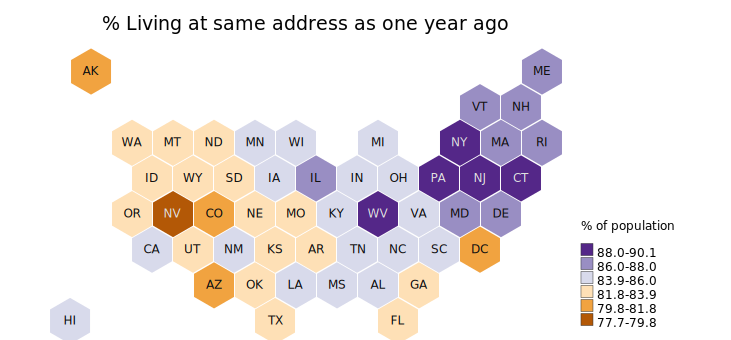

In [10]:
cg.draw_hex(spacing_dict={'margin_right': 150}, font_colors=font_colors_by_state)
cg.done(show=True)

And an alternate hex layout

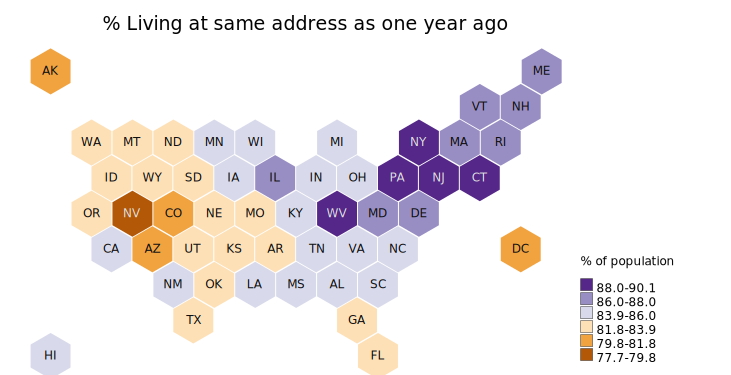

In [11]:
cg.draw_hex(x_column='althex_x', y_column='althex_y', spacing_dict={'margin_right': 150},
            font_colors=font_colors_by_state)
cg.done(show=True)

And a traditional choropleth map.

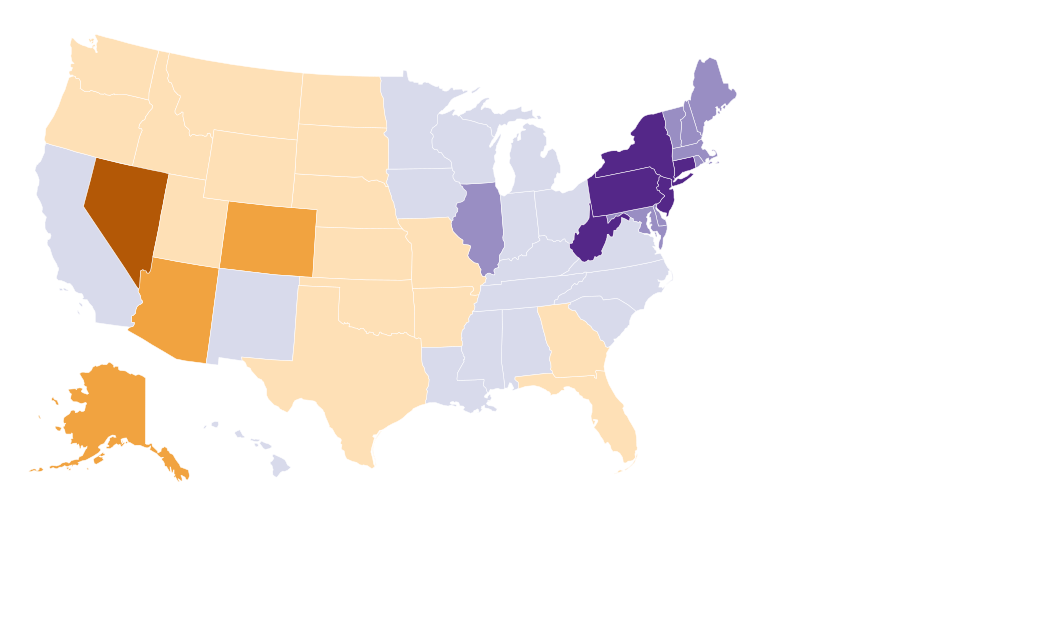

In [12]:
cg = Chorogrid('chorogrid/databases/usa_states.csv', states, colors_by_state)
cg.draw_map(spacing_dict={'legend_offset': [-150,-25]})
cg.done(show=True)

# To Do: Add state names. The required data is there in the database, but hasn't been implemented in code.

And a fancy one where states are represented by four hexes each.

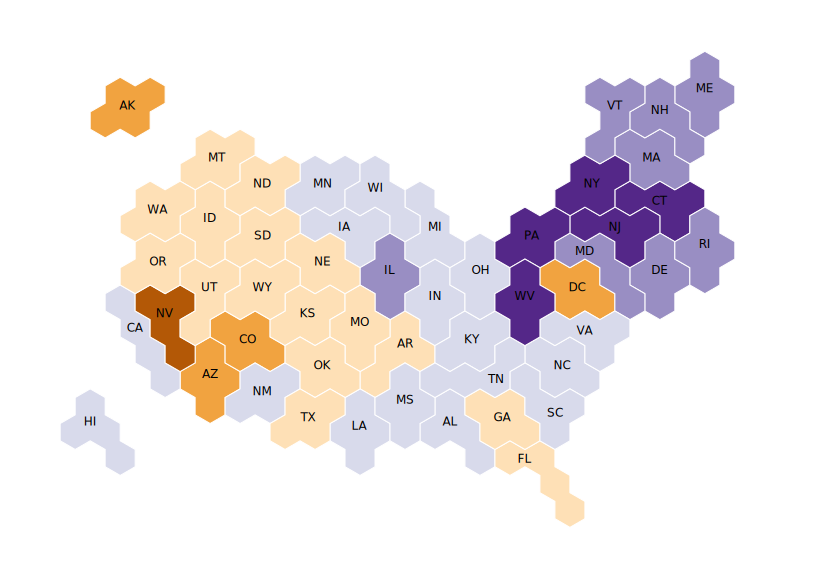

In [13]:
cg.draw_multihex()
cg.done(show=True)

There are currently three databases in Chorogrid: USA by state, as seen above, USA by county, which we'll look at ehre, and finally Europe by country, which will be shown below. FIPS (Federal Information Processing Codes) standards are used to identify counties.

In [14]:
df = pd.read_csv('chorogrid/sample_data/sample_county_data.csv', encoding='latin-1')

Let's have a look at the data. There are 3143 counties (including the 0-indexed one): counties are redefined every few years, this is the most recent count as of June 2015. If you have older data or if the borders change after that date, the mapping between data and map may not be perfect.

In [15]:
df.tail()

,County and state name,fips,Median_value_of_owner-occupied_housing_units_2009-2013
3138,"Yuma County, AZ",4027,118000
3139,"Yuma County, CO",8125,136600
3140,"Zapata County, TX",48505,55700
3141,"Zavala County, TX",48507,39900
3142,"Ziebach County, SD",46137,70100


Use colorbin to divide the quantities into six bins

In [16]:
mybin = Colorbin(df['Median_value_of_owner-occupied_housing_units_2009-2013'], mycolors, proportional=False, decimals=None)
mybin.fenceposts

[0, 76400, 90500, 108700, 136200, 176800, 929700]

Reset the fenceposts in order to have whole numbers

In [17]:
mybin.fenceposts = [0, 50000, 100000, 150000, 250000, 500000, 1000000]
mybin.recalc(False)
mybin.labels

['0-50000',
 '50000-100000',
 '100000-150000',
 '150000-250000',
 '250000-500000',
 '500000-1000000']

Here are the columns for the counties database. Note that it only has maps, not squares or hexes or multihexes (for now, anyway).

In [18]:
with open('chorogrid/databases/usa_counties_column_descriptions.txt', 'r', encoding='utf-8') as f:
    print(f.read())

﻿name          County name, e.g. "Santa Barbara"
state         2-letter state abbreviation, e.g. CA
map_path      SVG path for county outline
fips          Federal Information Processing Standards code for county in string format, e.g. "06083"
fips_integer  Federal Information Processing Standards code for county in integer format, e.g. 6083
middle_x      horizontal coordinate of center of county; not used for anything in this script, but provided just in case it's useful
middle_y      vertical coordinate of center of county; not used for anything in this script, but provided just in case it's useful



And here's the map.

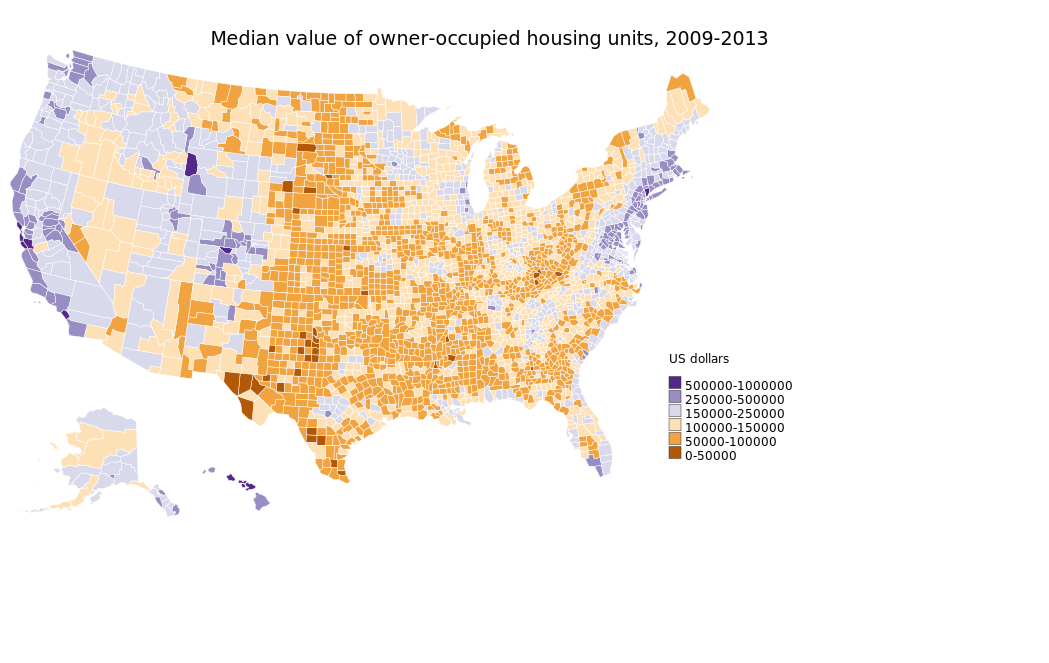

In [19]:
cg = Chorogrid('chorogrid/databases/usa_counties.csv', df.fips, mybin.colors_out, 'fips_integer')
cg.set_title('Median value of owner-occupied housing units, 2009-2013', font_dict={'font-size': 19})
cg.set_legend(mybin.colors_in, mybin.labels, title='US dollars')
cg.draw_map(spacing_dict={'legend_offset':[-300,-200], 'margin_top': 50}) # otherwise legend will be cut off
    # another strategy would be to pass a legend_offset to spacing_dict
cg.done(show=True, save_filename='eraseme')

Note that there are no state borders in the above graph; we can add it by adding the `statelines.txt` file, which has the appropriate path descriptions.

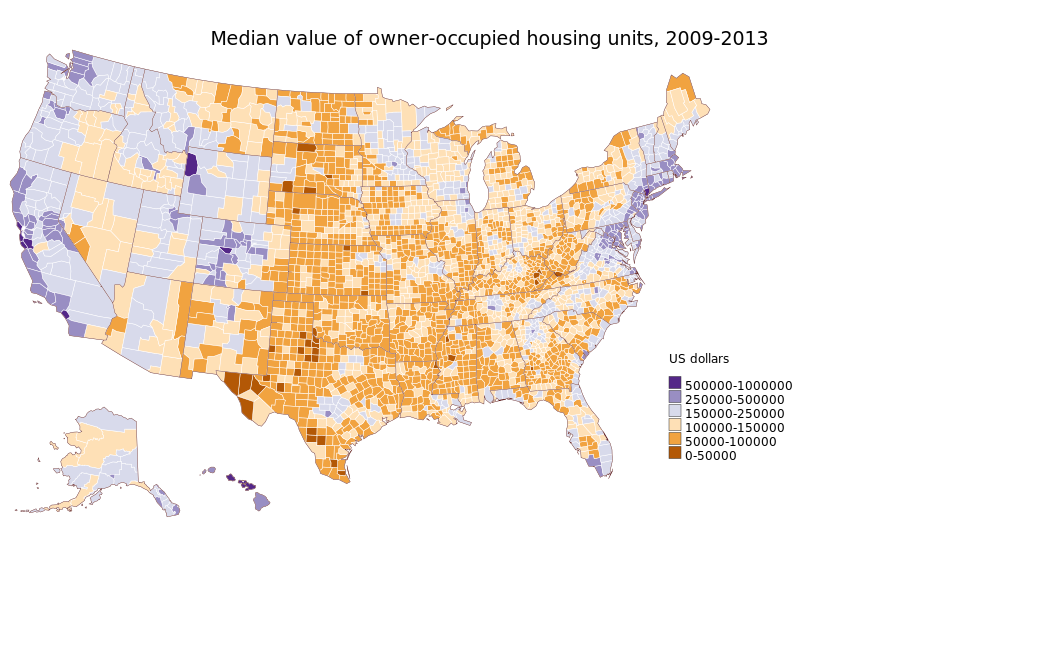

In [20]:
with open('chorogrid/databases/usa_counties_statelines.txt', 'r') as f:
    statelines = f.read()
cg.add_svg(statelines)
cg.done(show=True, save_filename='eraseme')

### Known bug: if you run this cell again, the borders will be offset.
### For now, you'll have to restart the kernel to get the state borders in the right place.

And now Europe. Our source data has two- and three-letter county abbreviations; for now, the database only has two-letter abbreviations.

In [21]:
with open('chorogrid/databases/europe_countries_column_descriptions.txt', 'r', encoding='utf-8') as f:
    print(f.read())

abbrev                       Two-letter ISO country code
full_name                    Full name

map_path                     SVG path for geographic map
map_fill_default             Number, 1-4, so that no countries sharing a border will have same fill
map_label_x                  X-coordinate for map label, e.g. country name
map_label_y                  Y-coordinate for map label
map_label_text_anchor        Text anchor (start, middle, end) for label
map_label_line_path          Path for line connecting country and label, if applicable

hex_x                        Horizontal position of hex grid
hex_y                        Vertical position of hex grid


In [22]:
df = pd.read_csv('chorogrid/sample_data/sample_europe_data.csv', encoding='latin-1')
df.tail()

,Country,abbrev2,abbrev3,Pct Internet users
48,Switzerland,CH,CHE,89.1
49,Turkey,TR,TUR,56.7
50,Ukraine,UA,UKR,41.8
51,United Kingdom,GB,GBR,89.8
52,Vatican City State,VU,VUT,57.0


And here's the choropleth.

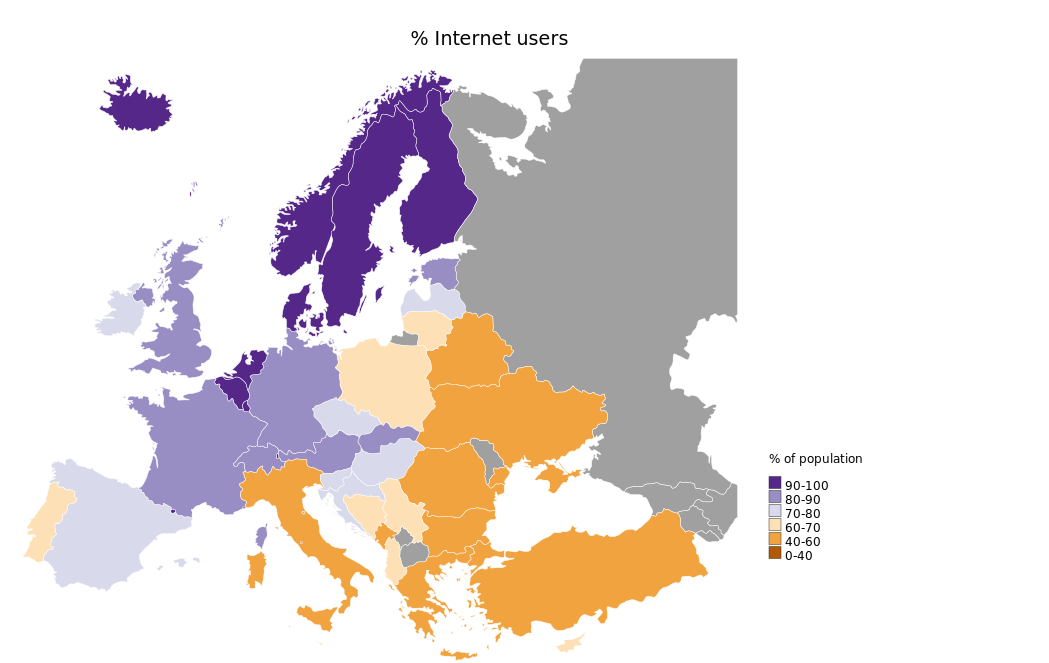

In [23]:
mybin = Colorbin(df['Pct Internet users'], mycolors, proportional=False, decimals=None)
mybin.fenceposts = [0, 40, 60, 70, 80, 90, 100]
mybin.recalc(False)
font_colors_europe = mybin.complements

cg = Chorogrid('chorogrid/databases/europe_countries.csv', df.abbrev2, mybin.colors_out, 'abbrev')
cg.set_title('% Internet users', font_dict={'font-size': 19})
cg.set_legend(mybin.colors_in, mybin.labels, title='% of population')
cg.draw_map(spacing_dict={'legend_offset':[-200,-100], 'margin_top': 50}) # otherwise legend will be cut off
    # another strategy would be to pass a legend_offset to spacing_dict
cg.done(show=True)

Note that in this case there was not a perfect mapping of country abbreviations between the source data and the database. Some small 'countries' like the Faroe Islands [FO] (which is part of the Danish Realm but is self-governing) are not in the database, while several countries including Russia [RU] are not in the data.

Finally, here's the hex grid:

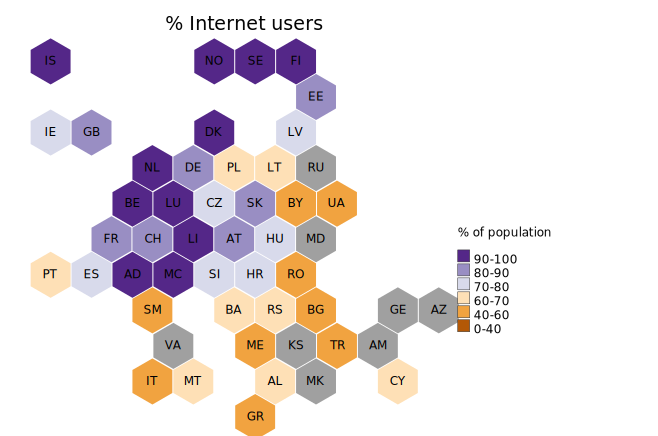

In [24]:
cg.draw_hex(spacing_dict={'legend_offset':[0, -100], 'margin_top': 50, 'margin_right': 200})
cg.done(show=True)

# Known issue: font_colors does not work for this Europe hex map.

Now to Canada. Here is a square grid of the 338 federal electoral ridings defined in 2013; since each riding has approximately the same population, it is almost a cartogram. Ridings are colored according to province.

In [25]:
with open('chorogrid/databases/canada_federal_ridings_column_descriptions.txt', 'r', encoding='utf-8') as f:
    print(f.read())

district_code               Federal electoral district code
province                    Two-letter province postal abbreviation
federal_electoral_district  Name of federal riding
population                  Population in riding
electors                    Number of eligible voters in riding
area_km2                    Area of riding in square kilometers
square_x                    Horizontal position of square
square_y                    Vertical position of square
truecolhex_x                Horizontal position of hex with true columns
truecolhex_y                Vertical position of hex with true columns


In [26]:
# assign a different color to each district_code according to province

import pandas as pd
df = pd.read_csv('chorogrid/databases/canada_federal_ridings.csv')
provinces = df.province.unique()
province2color = {}
for i, province in enumerate(provinces):
    province2color[province] = mycolors[i % len(mycolors)]
canada_riding_colors = [province2color[province] for province in list(df.province)]

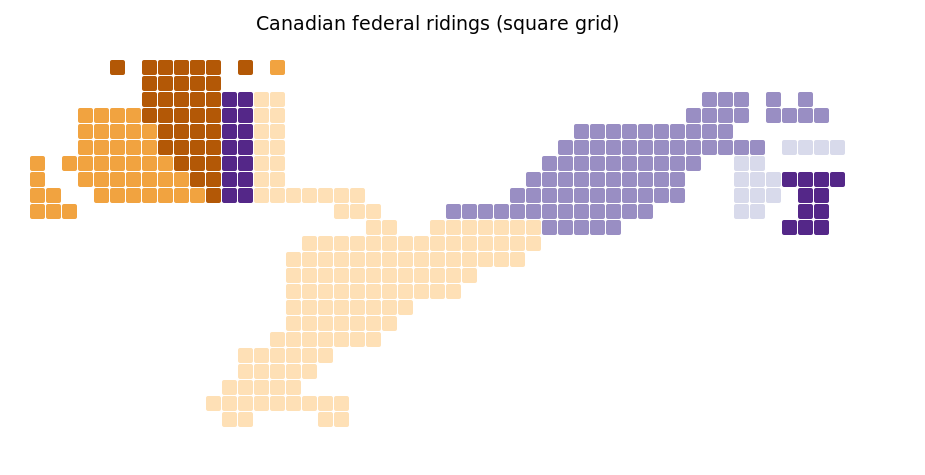

In [27]:
cg_ridings = Chorogrid('chorogrid/databases/canada_federal_ridings.csv', list(df.district_code), 
                       canada_riding_colors, 'district_code')
cg_ridings.set_title('Canadian federal ridings (square grid)', font_dict={'font-size': 19})
cg_ridings.draw_squares(spacing_dict={'cell_width': 15, 'roundedness': 2},
                        font_dict={'fill-opacity': 0})
cg_ridings.done(show=True)

# Note that we passed list(df.district_code) as ids because our colors happened to be ordered the same as the
# ids in the database file. This is normally not the case, so we have to explicitly pass ids every time
# Chorogrid is instantiated.

And here is a multisquare of the Canadian provinces based on the above ridings.

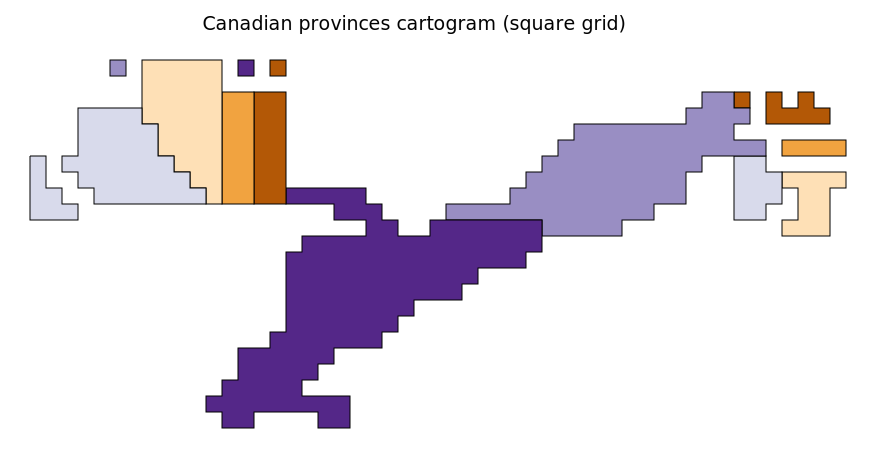

In [28]:
import pandas as pd
df_prov = pd.read_csv('chorogrid/databases/canada_provinces.csv')

canada_prov_colors = [mycolors[x % len(mycolors)] for x in range(len(list(df_prov.province)))]

cg_prov = Chorogrid('chorogrid/databases/canada_provinces.csv', df_prov.province, canada_prov_colors, 'province')
cg_prov.set_title('Canadian provinces cartogram (square grid)', font_dict={'font-size': 19})
cg_prov.draw_multisquare(font_dict={'fill-opacity': 0}, 
                    spacing_dict={'margin_bottom': 250, 'cell_width': 16,
                                  'stroke_width': 1, 'stroke_color': '#000000'})
cg_prov.done(show=True)

# Known issue: we have to add a bottom margin of 250 to make this map visible, normally the height variable
# should take care of that without tweaking. It's because the added height from the contours is not added.

Now we can overlay the borders from the provinces multisquare, setting the fill colors to 'none' (the string, not ``None`` the Python object), atop the ridings map.

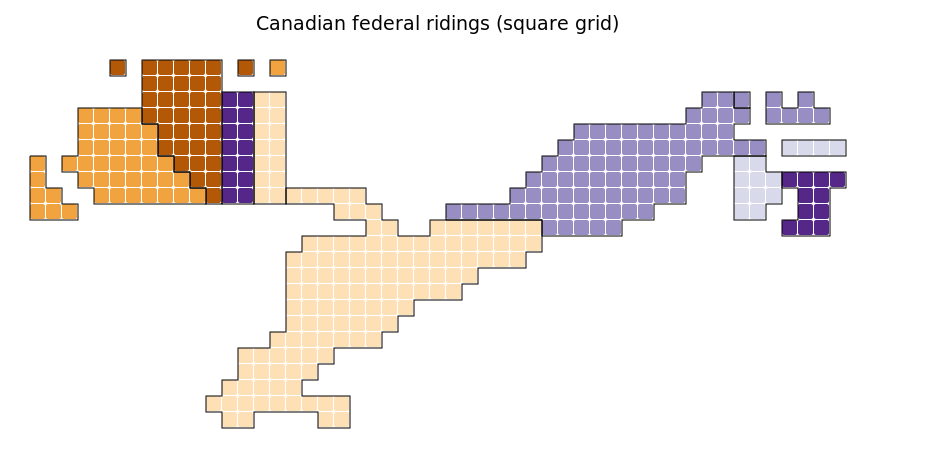

In [29]:
import pandas as pd
df = pd.read_csv('chorogrid/databases/canada_federal_ridings.csv')
provinces = df.province.unique()
province2color = {}
for i, province in enumerate(provinces):
    province2color[province] = mycolors[i % len(mycolors)]
canada_riding_colors = [province2color[province] for province in list(df.province)]

cg_ridings = Chorogrid('chorogrid/databases/canada_federal_ridings.csv', list(df.district_code), 
                       canada_riding_colors, 'district_code')
cg_ridings.set_title('Canadian federal ridings (square grid)', font_dict={'font-size': 19})
cg_ridings.draw_squares(spacing_dict={'cell_width': 15, 'roundedness': 2},
                        font_dict={'fill-opacity': 0})

df_prov = pd.read_csv('chorogrid/databases/canada_provinces.csv')
canada_prov_colors = ['none' for x in range(len(df_prov.province))]

cg_prov = Chorogrid('chorogrid/databases/canada_provinces.csv', df_prov.province, canada_prov_colors, 'province')
cg_prov.draw_multisquare(font_dict={'fill-opacity': 0}, 
                    spacing_dict={'margin_bottom': 250, 'cell_width': 16,
                                  'stroke_width': 1, 'stroke_color': '#000000'})

cg_ridings.done_and_overlay(cg_prov, show=True)

# Known issue: overlay cell width must be set to 16, while ridings cell width is set to 15, because
# overlay stroke==1.